<a href="https://colab.research.google.com/github/Wasan-Mohammed/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection_Data_Mining_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **🧠 Credit Card Fraud Detection Data Mining Mini Project**

### 📌 **1. Import the Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

### 📁 **2. Load the Dataset**

In [ ]:
# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the CSV
df = pd.read_csv("CREDIT CARD.csv")
df.head()

Saving CREDIT CARD.csv to CREDIT CARD (1).csv


,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,15:35.5,4189.27,688,refund,San Antonio,0
1,2,20:35.5,2659.71,109,refund,Dallas,0
2,3,08:35.5,784.00,394,purchase,New York,0
3,4,50:35.5,3514.40,944,purchase,Philadelphia,0
4,5,51:35.5,369.07,475,purchase,Phoenix,0


   - Print the first few rows of the dataset to verify the data:

In [ ]:
 print(df.head())

   TransactionID TransactionDate   Amount  MerchantID TransactionType  \
0              1         15:35.5  4189.27         688          refund   
1              2         20:35.5  2659.71         109          refund   
2              3         08:35.5   784.00         394        purchase   
3              4         50:35.5  3514.40         944        purchase   
4              5         51:35.5   369.07         475        purchase   

       Location  IsFraud  
0   San Antonio        0  
1        Dallas        0  
2      New York        0  
3  Philadelphia        0  
4       Phoenix        0  


### 🔍 **3. Explore the Dataset**

a. Basic Info

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    5999 non-null   int64  
 1   TransactionDate  5999 non-null   object 
 2   Amount           5999 non-null   float64
 3   MerchantID       5999 non-null   int64  
 4   TransactionType  5999 non-null   object 
 5   Location         5999 non-null   object 
 6   IsFraud          5999 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 328.2+ KB
None


 b. Statistical Summary
   - Analyze the statistical summary of the dataset:

In [ ]:
print(df.describe())

       TransactionID       Amount   MerchantID      IsFraud
count    5999.000000  5999.000000  5999.000000  5999.000000
mean     3000.000000  2482.767918   504.165361     0.011335
std      1731.906464  1457.412701   288.668707     0.105871
min         1.000000     1.380000     1.000000     0.000000
25%      1500.500000  1221.070000   253.000000     0.000000
50%      3000.000000  2453.500000   504.000000     0.000000
75%      4499.500000  3757.395000   755.500000     0.000000
max      5999.000000  4999.180000  1000.000000     1.000000


In [ ]:
print(df.isnull().sum())

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64


### 📊 **4. Data Visualization**

   - Visualize the data using Seaborn:

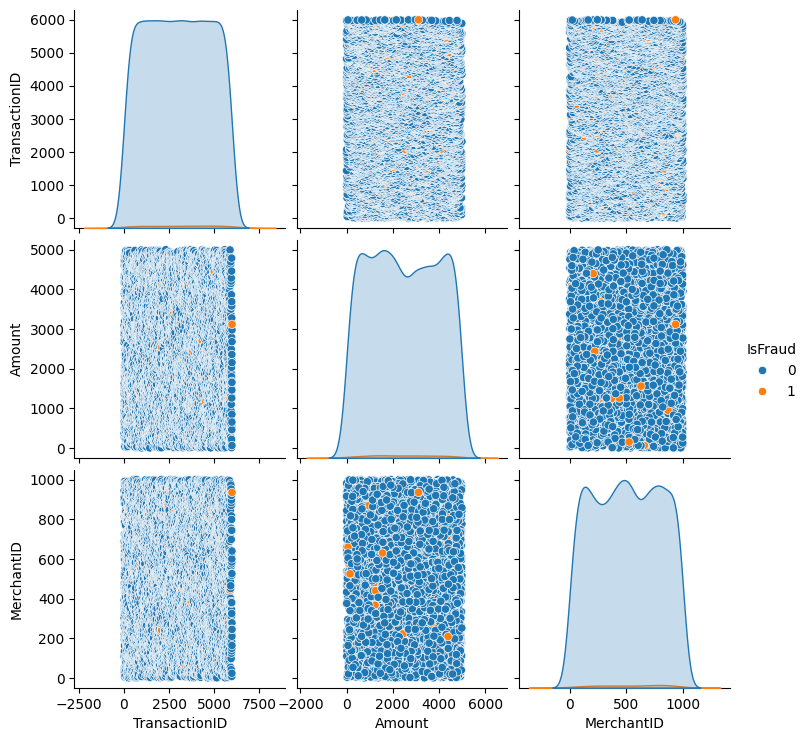

In [ ]:

sns.pairplot(df, hue='IsFraud')
plt.show()

Histogram

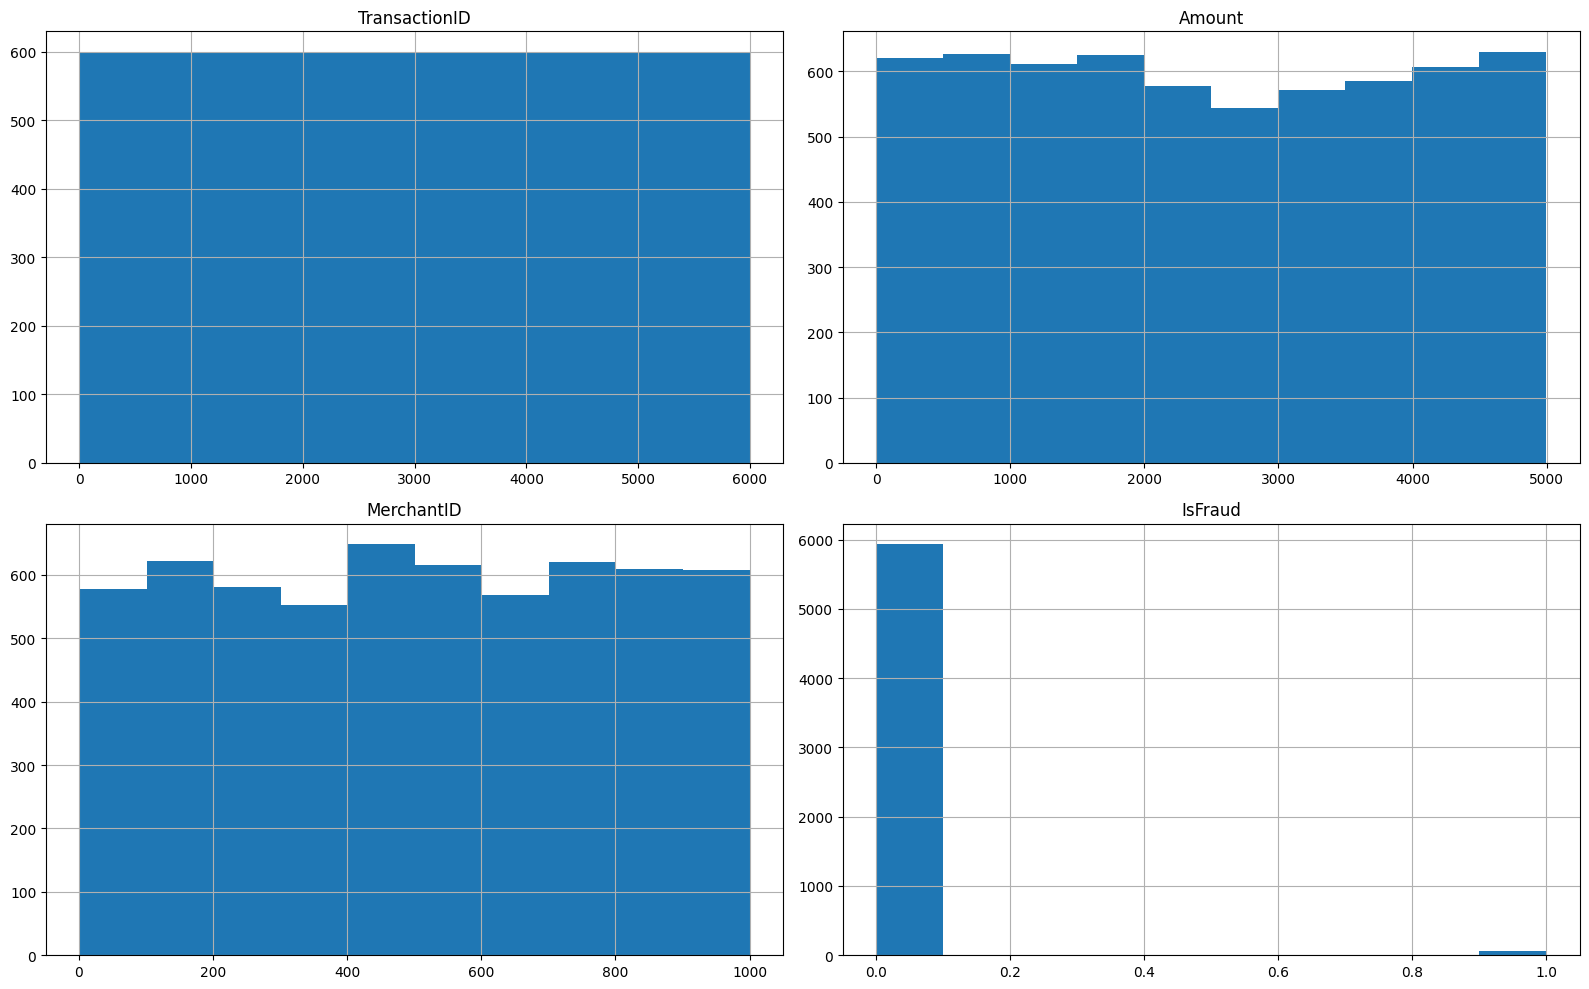

In [ ]:
df.hist(figsize=(16, 10))
plt.tight_layout()
plt.show()

Box Plot

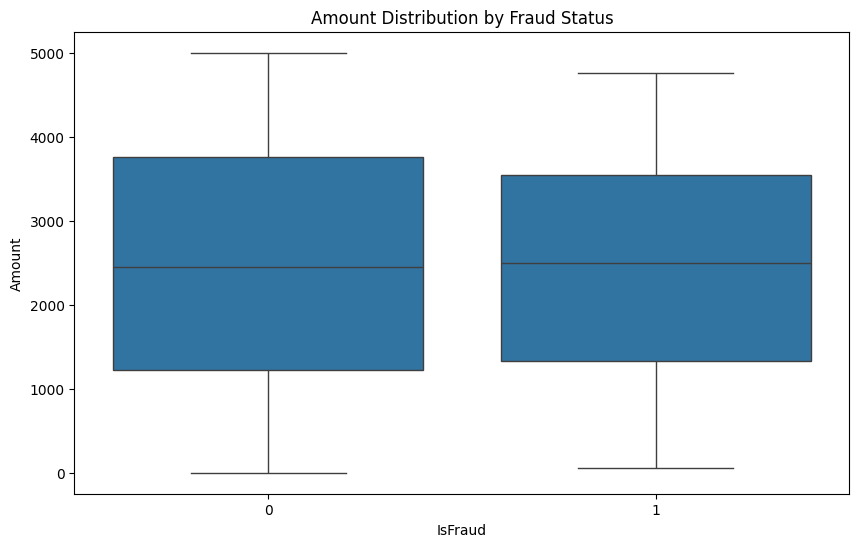

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsFraud', y='Amount', data=df)  # Replace 'data' with 'df'
plt.title('Amount Distribution by Fraud Status')
plt.xlabel('IsFraud')
plt.ylabel('Amount')
plt.show()

Correlation Heatmap

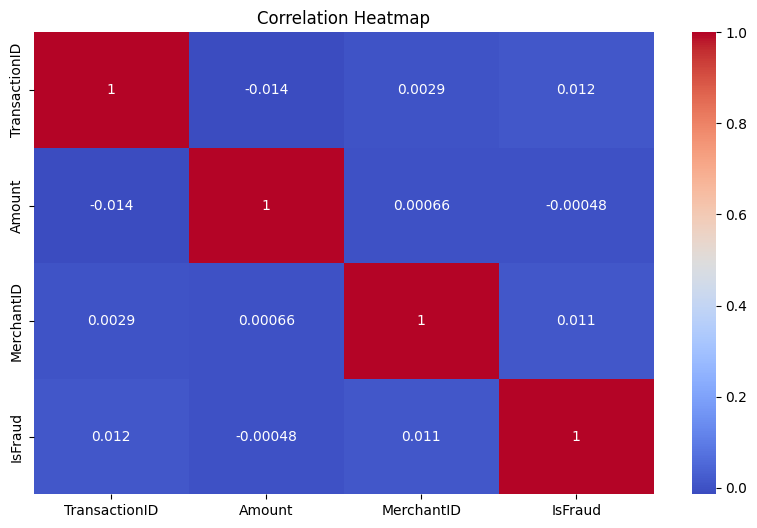

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))

# Select only numerical features for correlation
numerical_df = df.select_dtypes(include=np.number)

sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

c. Fraud vs Non-fraud Count

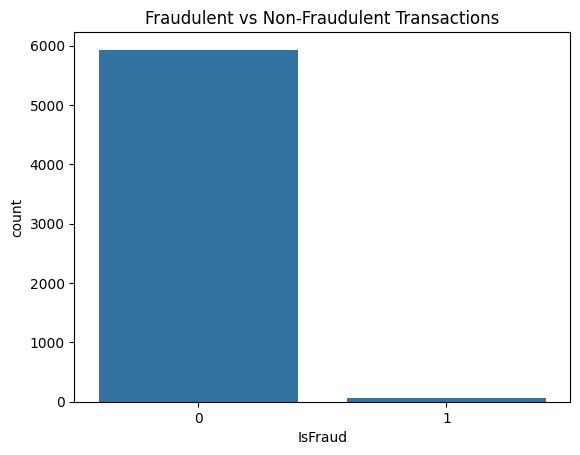

In [ ]:
sns.countplot(x='IsFraud', data=df)
plt.title("Fraudulent vs Non-Fraudulent Transactions")
plt.show()

# 🧹 **5. Data Preprocessing**
   - Handle missing values (if any):

In [ ]:
# Check for missing values
print(df.isnull().sum())

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64


In [ ]:
# Handle missing values (if any)
# Select only numerical columns for filling missing values
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

#### a. Convert `TransactionDate` to datetime

In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%H:%M.%S', errors='coerce').dt.time

In [ ]:
# Check if 'TransactionDate' column exists in the DataFrame
if 'TransactionDate' in df.columns:
    # Convert 'TransactionDate' to datetime if it exists
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%H:%M.%S', errors='coerce').dt.time
else:
    print("Column 'TransactionDate' not found in the DataFrame.")

#### b. Encode Categorical Features

In [ ]:
le = LabelEncoder()
df['TransactionType'] = le.fit_transform(df['TransactionType'])  # purchase=1, refund=0
df['Location'] = le.fit_transform(df['Location'])

#### c. Drop Unnecessary Columns

#### d. Scale the Data

In [ ]:
# Convert 'TransactionDate' to numerical representation (e.g., seconds since epoch)
if 'TransactionDate' in df.columns:
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%H:%M.%S', errors='coerce').astype(np.int64) // 10**9
else:
    print("Column 'TransactionDate' not found in the DataFrame.")

# Now proceed with scaling
scaler = StandardScaler()
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']
X_scaled = scaler.fit_transform(X)

In [ ]:
scaler = StandardScaler()
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']
X_scaled = scaler.fit_transform(X)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>)

### 🧪 **6. Split the Dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 🤖 **7. Apply Classification Algorithms**

#### a. Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9875
[[1185    0]
 [  15    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1185
           1       0.00      0.00      0.00        15

    accuracy                           0.99      1200
   macro avg       0.49      0.50      0.50      1200
weighted avg       0.98      0.99      0.98      1200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### b. Decision Tree Classifier

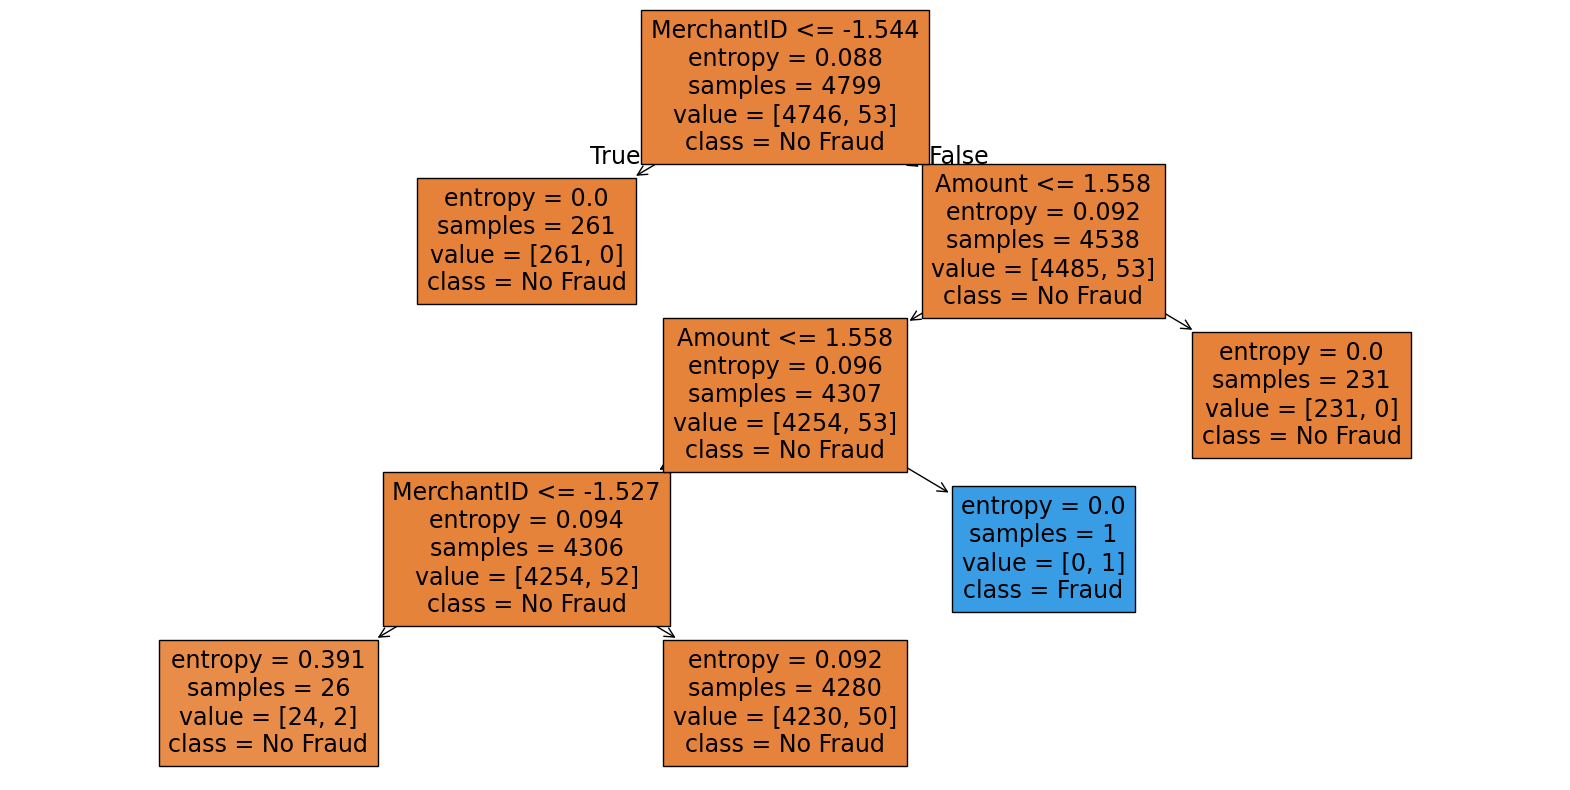

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Fraud', 'Fraud'])
plt.show()

In [ ]:
# Evaluate
y_pred_tree = clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.9866666666666667
[[1184    1]
 [  15    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1185
           1       0.00      0.00      0.00        15

    accuracy                           0.99      1200
   macro avg       0.49      0.50      0.50      1200
weighted avg       0.98      0.99      0.98      1200



#### c. Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9875
[[1185    0]
 [  15    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1185
           1       0.00      0.00      0.00        15

    accuracy                           0.99      1200
   macro avg       0.49      0.50      0.50      1200
weighted avg       0.98      0.99      0.98      1200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 🔍 **8. Clustering (Pattern Recognition)**

#### a. K-Means Clustering

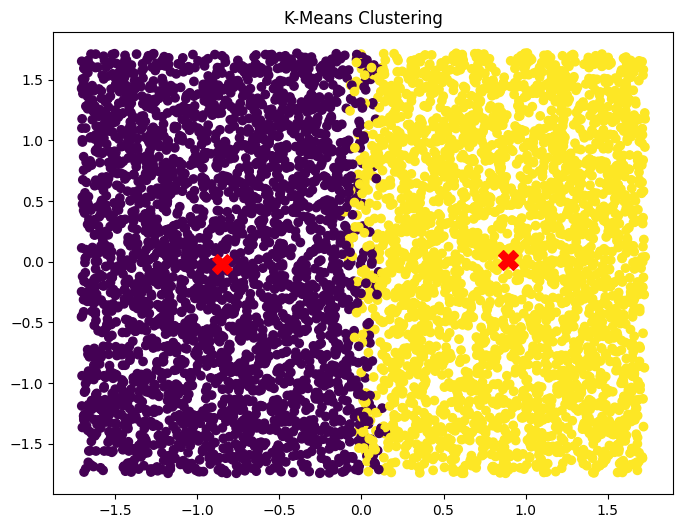

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.title("K-Means Clustering")
plt.show()

#### b. Hierarchical Clustering

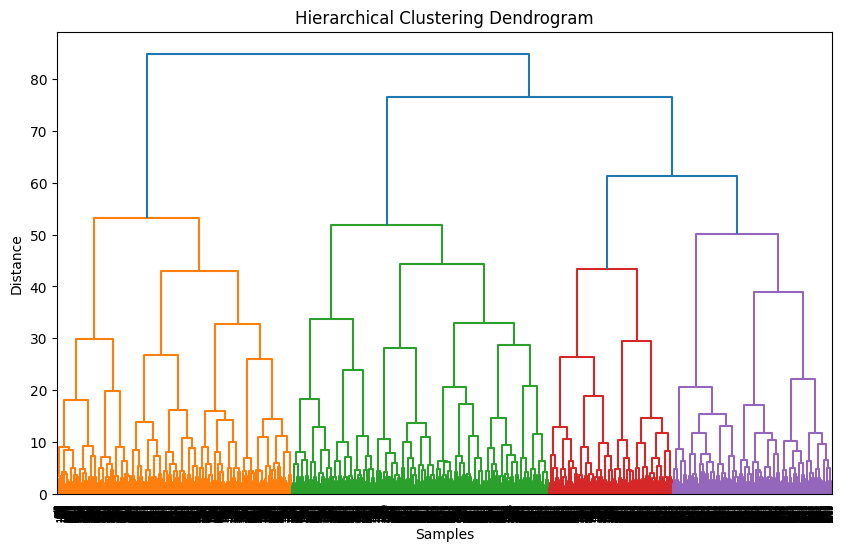

In [ ]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

#### c. DBSCAN Clustering

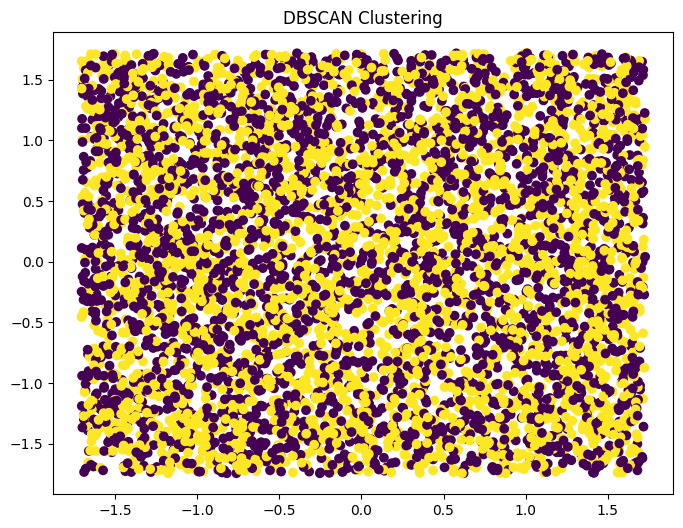

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()

### 📌 **9. Feature Importance (Random Forest)**

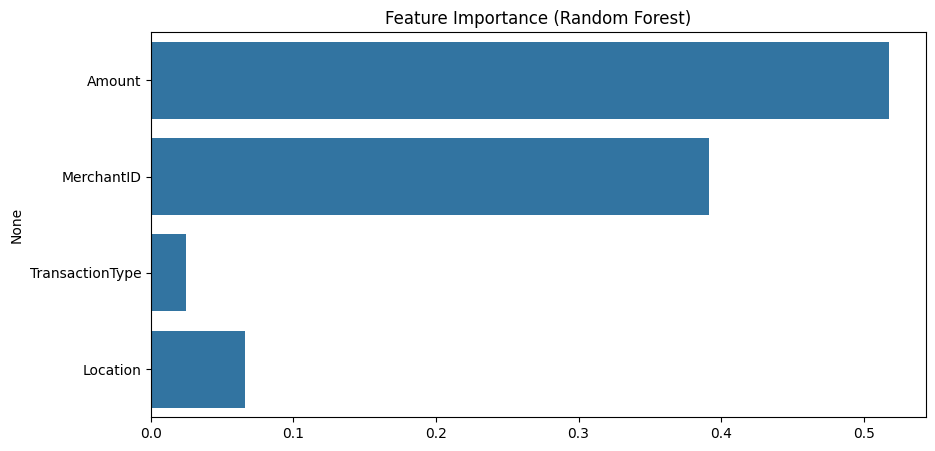

In [ ]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()